# Qubit Visualization

What are the possible states a qubit can be in and how can we build up a visual cue to help us make sense of quantum states and their evolution?

We know our qubit can have two distinct states: $\ket{0}$ and $\ket{1}$. Maybe we need a one-dimensional line whose vertices can
represent each of the states. We also know that qubits can be in an equal superposition states: $\ket{+}$ and $\ket{-}$. This now forces us to extend our 1D line to a 2D Cartesian coordinate system. If you dive deeper you will learn about the existence of states like 
$\ket{+i}$ and $\ket{-i}$, this calls for a 3D extension.

It turns out that a sphere is able to depict all the possible states of a single qubit. This is called a Bloch sphere. 

<img src="images/Bloch_sphere.png" alt="Bloch Sphere" width="300" height="300">

Unfortunately, there is no such handy visualization for multi-qubit states. In particular, a multi-qubit state cannot be visualized as multiple Bloch  spheres due to the nature of entanglement that makes quantum computing so powerful. 

Let us try to showcase the functionality to render such a 3D representation with CUDA-Q. 
First, let us define a single-qubit kernel that returns a different state each time. This kernel uses random rotations.

Note: CUDA-Q uses the [QuTiP](https://qutip.org) library to render Bloch spheres. The following code will throw an error if QuTiP is not installed. 

In [1]:
# install `qutip` in the current Python kernel. Skip this if `qutip` is already installed.
# `matplotlib` is required for all visualization tasks.
# Make sure to restart your kernel if you execute this!
# In a Jupyter notebook, go to the menu bar > Kernel > Restart Kernel.
# In VSCode, click on the Restart button in the Jupyter toolbar.

# The '\' before the '>' operator is so that the shell does not misunderstand
# the '>' qualifier for the bash pipe operation.

import sys

try:
    import matplotlib.pyplot as plt
    import qutip

except ImportError:
    print("Tools not found, installing. Please restart your kernel after this is done.")
    !{sys.executable} -m pip install qutip\>=5 matplotlib\>=3.5
    print("\nNew libraries have been installed. Please restart your kernel!")


Tools not found, installing. Please restart your kernel after this is done.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/28.0 MB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/28.0 MB 9.3 MB/s eta 0:00:03

     ━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/28.0 MB 55.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━ 19.0/28.0 MB 236.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 27.9/28.0 MB 256.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 28.0/28.0 MB 249.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 63.1 MB/s eta 0:00:00



New libraries have been installed. Please restart your kernel!


In [2]:
import cudaq
import numpy as np

## Retry the subsequent cells by setting the target to density matrix simulator.
# cudaq.set_target("density-matrix-cpu")


@cudaq.kernel
def kernel(angles: np.ndarray):
    qubit = cudaq.qubit()
    rz(angles[0], qubit)
    rx(angles[1], qubit)
    rz(angles[2], qubit)


Next, we instantiate a random number generator, so we can get random outputs. We then create 4 random single-qubit states by using `cudaq.add_to_bloch_sphere()` on the output state obtained from the random kernel.

In [3]:
rng = np.random.default_rng()
blochSphereList = []
for _ in range(4):
    angleList = rng.random(3) * 2 * np.pi
    sph = cudaq.add_to_bloch_sphere(cudaq.get_state(kernel, angleList))
    blochSphereList.append(sph)


We can display the spheres with `cudaq.show()`. Show the first sphere:

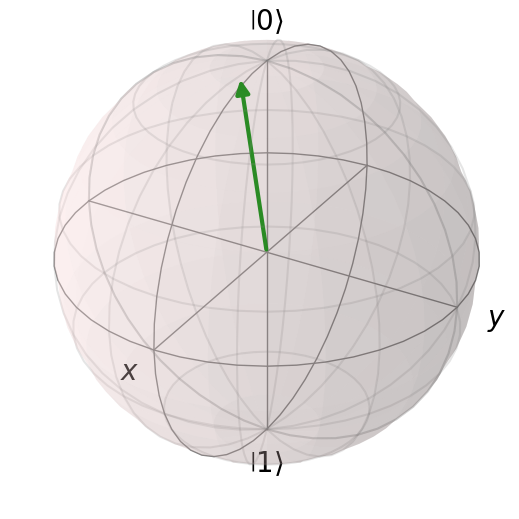

In [4]:
cudaq.show(blochSphereList[0])

We can also show multiple Bloch spheres side by side - simply set the `nrows` and `ncols` in the call to `cudaq.show()` accordingly. Make sure to have more spaces than spheres in your list, else it will throw an error! Let us show two spheres in a row:

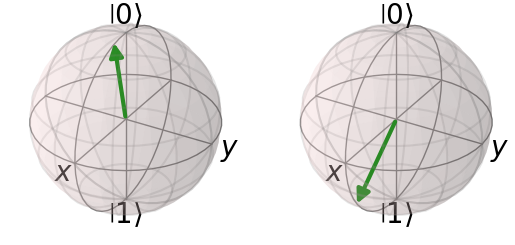

In [5]:
cudaq.show(blochSphereList[:2], nrows=1, ncols=2)

We can show them in a column too, if we want! Simply set the `nrows = 2` and `ncols = 1`.

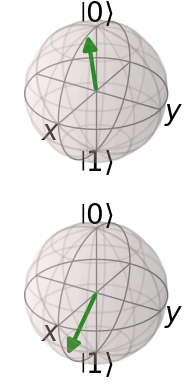

In [6]:
cudaq.show(blochSphereList[:2], nrows=2, ncols=1)

Can we show the entire list of 4 Bloch spheres we created? Absolutely!

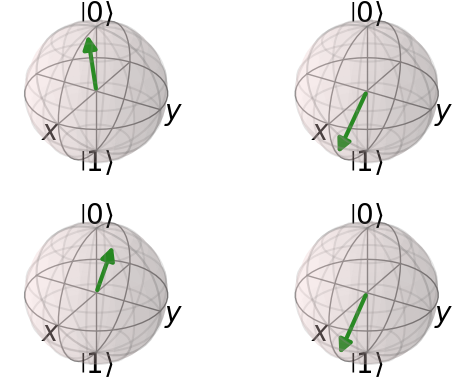

In [7]:
cudaq.show(blochSphereList[:], nrows=2, ncols=2)

What if we had to add multiple vectors to a single Bloch sphere? CUDA-Q uses the [QuTiP](https://www.qutip.org) toolbox to construct Bloch spheres. We can then add multiple states to the same Bloch sphere by passing the sphere object as an argument to `cudaq.add_to_bloch_sphere()`.

In [8]:
import qutip

rng = np.random.default_rng()
blochSphere = qutip.Bloch()
for _ in range(10):
    angleList = rng.random(3) * 2 * np.pi
    sph = cudaq.add_to_bloch_sphere(cudaq.get_state(kernel, angleList), blochSphere)


This created a single Bloch sphere with 10 random vectors. Let us see how it looks.

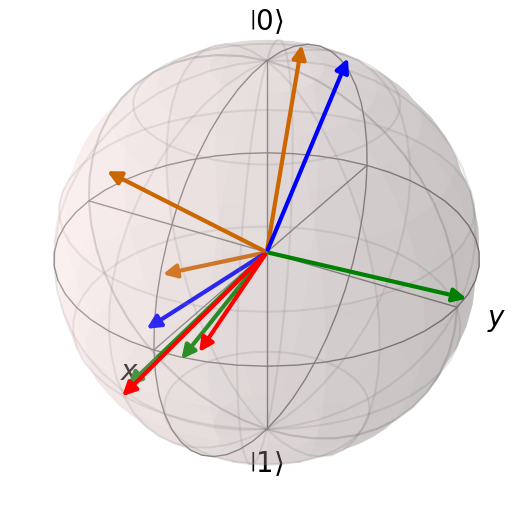

In [9]:
blochSphere.show()